<a href="https://colab.research.google.com/github/dariashcherbakovaaa/MA_DSE_Unimi/blob/network_science/Network_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# EDA on the Network

The data is used from https://networkrepository.com/ca-netscience.php

```
# @inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}
```



In [18]:
G = nx.Graph()

with open('ca-netscience.mtx', 'r') as f:
    for line in f:
        if line.startswith('%'):
            continue
        nodes = line.strip().split(' ')
        node1 = int(nodes[0])
        node2 = int(nodes[1])
        G.add_edge(node1, node2)
print(G)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Graph with 379 nodes and 914 edges
Number of nodes: 379
Number of edges: 914


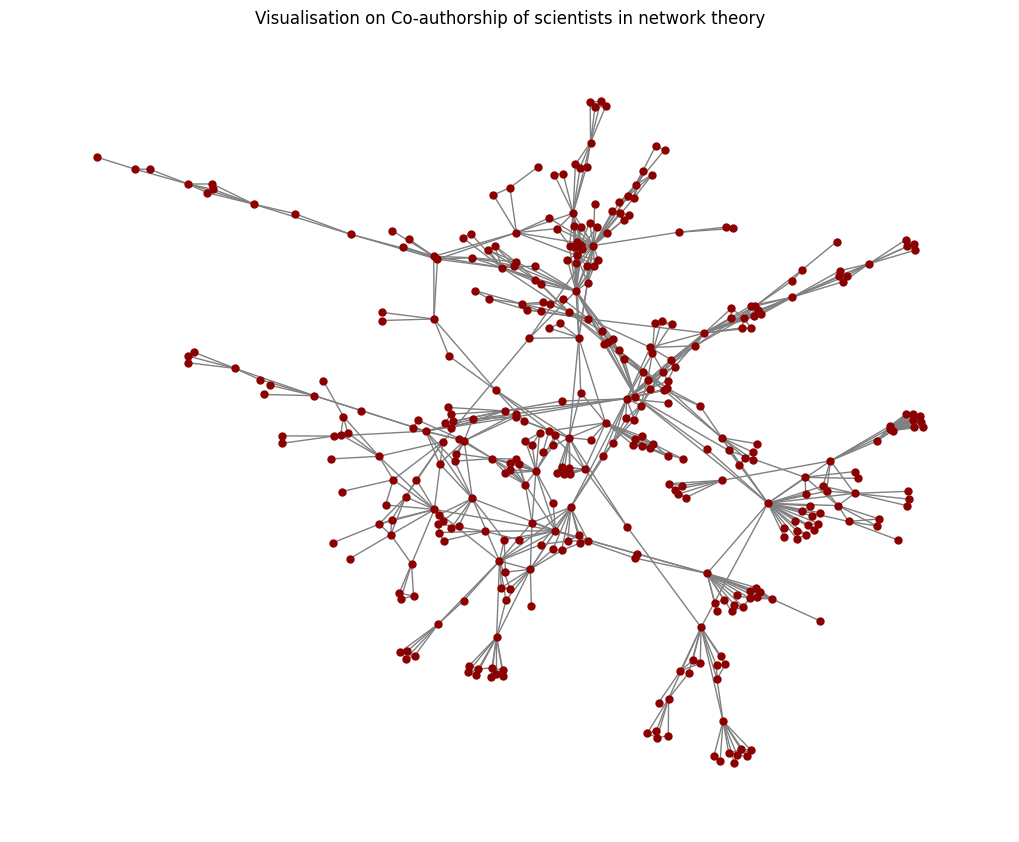

In [32]:
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=25, node_color = 'darkred', edge_color = 'gray')
plt.title('Visualisation on Co-authorship of scientists in network theory')
plt.show()

In [38]:
num_nodes = G.number_of_nodes()
print(f'Number of nodes in the network: {num_nodes}')

num_edges = G.number_of_edges()
print(f'Number of links in the network: {num_edges}')

num_connected_components = nx.number_connected_components(G)
print(f'Number of connetced components in the network: {num_connected_components}')

density = nx.density(G)
print(f"The density of the network: {density:.4f}")

diameter = nx.diameter(G)
print(f"The network diameter is: {diameter}")

Number of nodes in the network: 379
Number of links in the network: 914
Number of connetced components in the network: 1
The density of the network: 0.0128
The network diameter is: 17


In [42]:
degree = dict(nx.degree(G))
degree_centrality = {n: round(c/(G.order()-1),4) for n,c in degree.items()}
node_d_centr = list(degree_centrality.items())
node_d_centr.sort(key = lambda x: x[1], reverse = True)
node_d_centr[:5]

[(4, 0.0899), (5, 0.0714), (26, 0.0714), (16, 0.0556), (67, 0.0503)]

In [46]:
degree_sum = sum(dict(G.degree()).values())
average_degree = degree_sum / num_nodes

print("Average Degree:", average_degree)

Average Degree: 4.823218997361478


In [51]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize = (10,5))
    nx.draw_networkx(g,
                     pos=p,

                     font_size = 5,
                     font_weight = 'bold',
                     font_color = 'navy',
                     edge_color = 'grey'
                    )

    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color=[c for c in centrality.values()],
                     node_size = 25,
                     )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

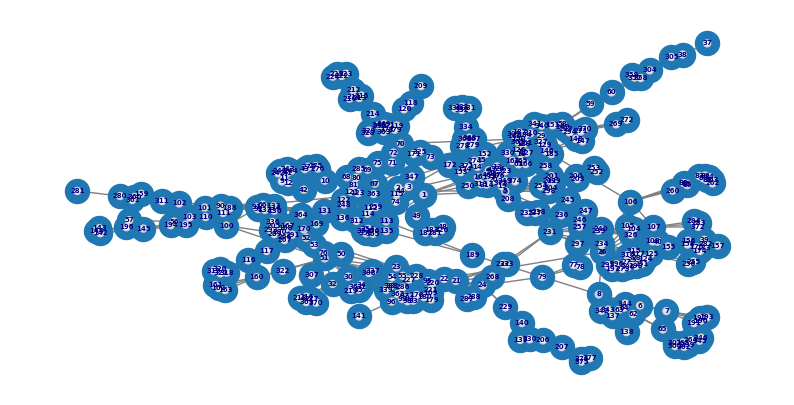

In [52]:
position = nx.spring_layout(G)
draw_network_colored(G, position, degree_centrality)